In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_Constraint/mplstyles


# Summary

The purpose of this book is to show how the extracted Fano factor, combined with the expected yield with plus multiple-scatter modification, can predict the trend of the EDELWEISS measured ionization yield width. And, how that final predicted width function can be used to extract the systematic deviation due to the finite binning of the EDELWEISS data. 

# Extracted Fano Factor Matching

In [2]:
import fano_calc as fc
#recall defaults (filename='test.h5', 
#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
E,sig = fc.RWCalc(filename='data/res_calc.h5',band='NR',alpha=(1/18.0),F=999)
Ebase,sigbase = fc.RWCalc(filename='data/res_calc.h5',band='NR',alpha=(1/18.0),F=000)

GGA3/NR/4.0/5.556E-02/0.0381/999/
True
GGA3/NR/4.0/5.556E-02/0.0381/000/
True


In [3]:
import h5py
filename = 'data/mcmc_fits.h5'
#remove vars
f = h5py.File(filename,'r')

#save the results for the Edw fit
path='{}/{}/'.format('mcmc','edwdata')

Cms = np.asarray(f[path+'Cms'])
slope = np.asarray(f[path+'m'])
samples = np.asarray(f[path+'samples'])
sampsize = np.asarray(f[path+'sampsize'])
xl = np.asarray(f[path+'Er'])
upvec = np.asarray(f[path+'Csig_u'])
dnvec = np.asarray(f[path+'Csig_l'])
Sigss = np.asarray(f[path+'Sigss'])

print(Cms)
f.close()

0.03132154537261885


In [4]:
# import data from Edelweiss
import pandas as pds
res_data = pds.read_csv("data/edelweiss_NRwidth_GGA3_data.txt", skiprows=1, \
                       names=['E_recoil', 'sig_NR', 'E_recoil_err', 'sig_NR_err'], \
                       delim_whitespace=True)

resER_data = pds.read_csv("data/edelweiss_ERwidth_GGA3_data.txt", skiprows=1, \
                         names=['E_recoil', 'sig_ER', 'sig_ER_err'], \
                         delim_whitespace=True)

resER_data = resER_data.sort_values(by='E_recoil')

print (res_data.head(10))
E_recoil = res_data["E_recoil"]
sig_NR = res_data["sig_NR"]
sig_NR_err = res_data['sig_NR_err']
E_recoil_ER = resER_data["E_recoil"]
sig_ER = resER_data["sig_ER"]
sig_ER_err = resER_data['sig_ER_err']

   E_recoil    sig_NR  E_recoil_err  sig_NR_err
0   16.1946  0.062345      0.946176    0.001157
1   16.4428  0.062345      0.945278    0.001157
2   44.2627  0.046528      0.992477    0.001543
3   24.5012  0.059397      0.992477    0.001185
4   97.7172  0.044847      1.033260    0.002783
5   58.4014  0.050082      0.991830    0.002288
6   34.2156  0.053417      1.033260    0.001102


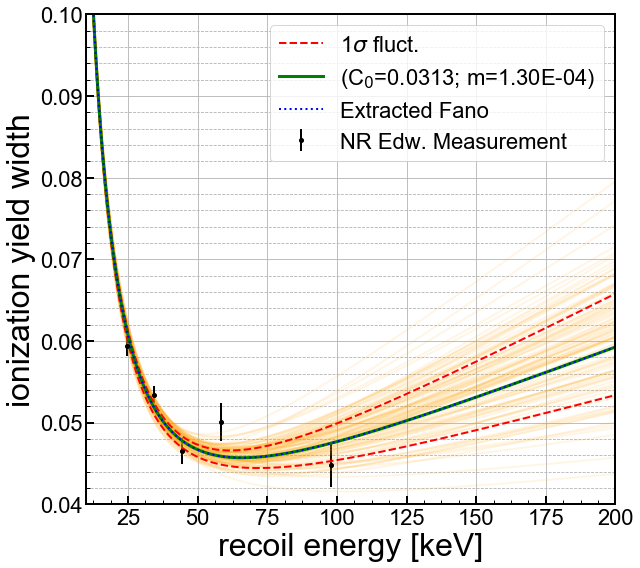

In [5]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

for Cms_em, m_em in samples[np.random.randint(len(samples), size=100)]:
    ax1.plot(xl, np.sqrt(Sigss**2+(Cms_em+m_em*xl)**2), color="orange", alpha=0.1)

ax1.plot(xl,upvec,color='r',linestyle="--",linewidth=2, \
         label='1$\sigma$ fluct.')
ax1.plot(xl,dnvec,color='r',linestyle="--",linewidth=2, \
         label='')


ax1.plot(xl,np.sqrt(Sigss**2+(Cms+xl*slope)**2),color='g',linestyle="-",linewidth=3, \
         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms,slope))

ax1.plot(E,sig,color='b',linestyle=":",linewidth=2, \
        label = 'Extracted Fano')

ax1.errorbar(E_recoil[2::],sig_NR[2::], yerr=sig_NR_err[2::], \
         color='k', marker='o', markersize=4,linestyle='none',label='NR Edw. Measurement', linewidth=2)

ymin = 0.04
ymax = 0.1



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

# Binning Systematic

energy bin|interval (keV)
:-|:-
0|\[5,10)
1|\[10,20)
2|\[20,30)
3|\[30,40)
4|\[40,50)
5|\[50,70)
6|\[70,150)

In [6]:
bins = [5, 10, 20, 30, 40, 50, 70,150]
bins = np.asarray(bins)

In order to evaluate the systematic we can approximate that the distribution in ionization yield at each energy is normal. That is it follows the probability distribution function:

\begin{equation}
P(Q|E_r) = \frac{1}{\sqrt{2\pi\sigma_Q(E_r)^2}} \exp{\left[\frac{(Q-\bar{Q})^2}{2\sigma_Q(E_r)^2}\right]},
\end{equation}

Is valid for a fixed energy, $E_r$. 

Using the law of conditional probability we can then simply obtain the joint distribution $P(Q,E_r)$ and integrate over the recoil energy bin. We get the following:

\begin{equation}
P_i(Q) = \frac{\int_{a_i}^{b_i} dE_r P(Q|E_r)P(E_r)}{N},
\end{equation}

where N is a normalization factor, $P_i(Q)$ is the yield probability distribution over the bin $i$, and $P(E_r)$ is the probability of getting a given recoil energy (approximated throughout this analysis as an exponential with decay coefficient $\alpha$ = (1/18.0) keV$^{-1}$).

With this function the _measured_ yield width over a finite bin can be calculated quite simply:

\begin{equation}
\begin{aligned}
\langle Q \rangle &= \int_{-\infty}^{\infty} dQ Q P(Q) \\
\langle Q^2 \rangle &= \int_{-\infty}^{\infty} dQ Q^2 P(Q) \\
\sigma_{Qi} &= \sqrt{\langle Q^2 \rangle - \langle Q \rangle^2}
\end{aligned}
\end{equation}

In [7]:
#make a spline
import scipy.interpolate as inter
sig_final = inter.InterpolatedUnivariateSpline(E, sig, k=3)
sig_ss = inter.InterpolatedUnivariateSpline(Ebase, sigbase, k=3)

#get mean yield
Qbar=lambda x: 0.16*x**0.18

#make the function for Er
alpha = (1/18.0)
pnr = lambda Er: (1/alpha)*np.exp(-alpha*Er)

pqe = lambda Q,Er: (1/np.sqrt(2*np.pi*sig_final(Er)**2))*np.exp(-(Q-Qbar(Er))**2/(2*sig_final(Er)**2))

#integrate
from scipy.integrate import quad
igrnd = lambda Er,Q: pqe(Q,Er)*pnr(Er)



#pq = lambda Q,El,Eh: quad(igrnd,El,Eh,limit=100,args=(Q,))[0]

#norm = lambda El,Eh: quad(pq,-5,5,limit=100,args=(El,Eh,))[0]
    
#pq_norm = lambda Q,El,Eh: pq(Q,El,Eh)/norm(El,Eh)


#pq_mean = lambda Q,El,Eh: Q*pq_norm(Q,El,Eh)
#pq_std = lambda Q,El,Eh: Q**2*pq_norm(Q,El,Eh)

#a = quad(pq_norm,-5,5,limit=100,args=(70,150,))

#print(a)

idx = np.argsort(E_recoil)
E_edw = E_recoil[idx]
sig_edw = sig_NR[idx]
sig_edw_err = sig_NR_err[idx]

pq = lambda Q,El,Eh: quad(igrnd,El,Eh,limit=100,args=(Q,))[0]

for i,Eloop in enumerate(bins):

  if i==np.shape(bins)[0]-1:
    break
    
  l = Eloop
  h = bins[i+1]
    
  print('calculating binning systematic for bin El: {}; Eh: {}'.format(l,h))
  norm = quad(pq,-5,5,limit=100,args=(l,h,))[0]    
  pq_norm = lambda Q,El,Eh: pq(Q,El,Eh)/norm
  pq_mean = lambda Q,El,Eh: Q*pq_norm(Q,El,Eh)
  pq_std = lambda Q,El,Eh: Q**2*pq_norm(Q,El,Eh)

  a = quad(pq_norm,-5,5,limit=100,args=(l,h,))
  b = quad(pq_mean,-5,5,limit=100,args=(l,h,))
  c = quad(pq_std,-5,5,limit=100,args=(l,h,))

  Emid = (h+l)/2.0
  sigmid = sig_final(Emid)
  print(Qbar(Emid))
  print(b)
  sigcalc = np.sqrt(c[0] - b[0]**2)
  print(sigcalc)
  print(sigmid)

  sig_edw[i] = sig_edw[i]*(sigmid/sigcalc)
  sig_edw_err[i] = sig_edw_err[i]*(sigmid/sigcalc)

  cmid = np.sqrt(sigmid**2 - sig_ss(Emid)**2)
  ccalc = np.sqrt(sigcalc**2-sig_ss(Emid)**2)
  print(ccalc)
  print(cmid)
  print('percent error: {:1.2f}%'.format(((sigcalc-sigmid)/sigmid)*100))
  print('percent error on C: {:1.2f}%'.format(((ccalc-cmid)/cmid)*100))

calculating binning systematic for bin El: 5; Eh: 10
0.2299487272177406
(0.228650676353219, 8.081668330876446e-11)
0.16345588926523802
0.1552513737652268
0.06047999325200793
0.032295369703152874
percent error: 5.28%
percent error on C: 87.27%
calculating binning systematic for bin El: 10; Eh: 20
0.2605052075092577
(0.25829935825300465, 8.679075165867714e-11)
0.0934124751758409
0.08660639471865772
0.04829299623711319
0.03327146785527623
percent error: 7.86%
percent error on C: 45.15%
calculating binning systematic for bin El: 20; Eh: 30
0.28559406907626206
(0.284354324825841, 6.97756338471911e-09)
0.06236903690819859
0.06065318674014981
0.0375003168873877
0.03457146313845772
percent error: 2.83%
percent error on C: 8.47%
calculating binning systematic for bin El: 30; Eh: 40
0.3034256078547928
(0.30254994076151975, 5.683825903107654e-10)
0.05215751494627309
0.05145798645243321
0.03686789912091564
0.035871436965336526
percent error: 1.36%
percent error on C: 2.78%
calculating binning syst

In [8]:
#let's make a callable out of the predicted single-scatter resolution

sigQnr_c = inter.InterpolatedUnivariateSpline(Ebase, sigbase, k=3)
sigQnr_c_v = np.vectorize(sigQnr_c)

In [9]:
def log_likelihood(theta, x, y, yerr,sigfunc):
    Cms, m = theta
    model = np.sqrt(sigfunc(x)**2 + (Cms+m*x)**2)
    #sigma2 = yerr**2 + model**2*np.exp(2*log_f)
    sigma2 = yerr**2
    return -0.5*np.sum((y-model)**2/sigma2 + np.log(sigma2))

In [10]:
from scipy.optimize import minimize
np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([0.0207, 4.73e-5]) + 0.001*np.random.randn(2)
soln = minimize(nll, initial, args=(E_recoil[2::], sig_NR[2::], sig_NR_err[2::],sigQnr_c_v))
Cms_ml, m_ml = soln.x

#lmfout = lmf.minimize(residual_const, params, args=(E_recoil[2::], sig_NR[2::], sig_NR_err[2::],sigQnr_c_v))
print("Maximum likelihood estimates:")
print("m = {0:.4f}".format(Cms_ml))
print("b = {0:.3e}".format(m_ml))


Maximum likelihood estimates:
m = 0.0313
b = 1.300e-04


In [11]:
print(E_recoil)

0    16.1946
1    16.4428
2    44.2627
3    24.5012
4    97.7172
5    58.4014
6    34.2156
Name: E_recoil, dtype: float64


In [12]:
print(E_edw)
print(sig_edw)
print(E_recoil)
print(sig_NR)

0    16.1946
1    16.4428
3    24.5012
6    34.2156
2    44.2627
5    58.4014
4    97.7172
Name: E_recoil, dtype: float64
0    0.059216
1    0.057803
3    0.058600
6    0.054080
2    0.045248
5    0.049464
4    0.044521
Name: sig_NR, dtype: float64
0    16.1946
1    16.4428
2    44.2627
3    24.5012
4    97.7172
5    58.4014
6    34.2156
Name: E_recoil, dtype: float64
0    0.062345
1    0.062345
2    0.046528
3    0.059397
4    0.044847
5    0.050082
6    0.053417
Name: sig_NR, dtype: float64


In [13]:
nll = lambda *args: -log_likelihood(*args)
initial = np.array([0.0207, 4.73e-5]) + 0.001*np.random.randn(2)
soln = minimize(nll, initial, args=(E_edw[2::], sig_edw[2::], sig_edw_err[2::],sigQnr_c_v))
Cms_ml, m_ml = soln.x

#lmfout = lmf.minimize(residual_const, params, args=(E_recoil[2::], sig_NR[2::], sig_NR_err[2::],sigQnr_c_v))
print("Maximum likelihood estimates:")
print("m = {0:.4f}".format(Cms_ml))
print("b = {0:.3e}".format(m_ml))

Maximum likelihood estimates:
m = 0.0308
b = 1.290e-04


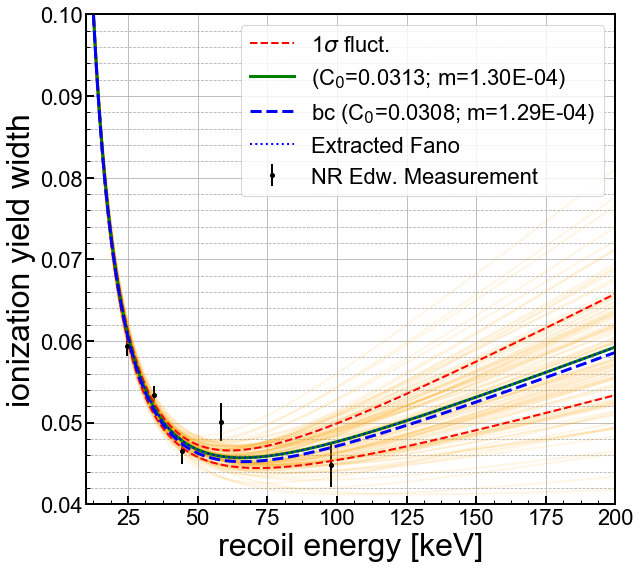

In [14]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

for Cms_em, m_em in samples[np.random.randint(len(samples), size=100)]:
    ax1.plot(xl, np.sqrt(Sigss**2+(Cms_em+m_em*xl)**2), color="orange", alpha=0.1)

ax1.plot(xl,upvec,color='r',linestyle="--",linewidth=2, \
         label='1$\sigma$ fluct.')
ax1.plot(xl,dnvec,color='r',linestyle="--",linewidth=2, \
         label='')


ax1.plot(xl,np.sqrt(Sigss**2+(Cms+xl*slope)**2),color='g',linestyle="-",linewidth=3, \
         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms,slope))

ax1.plot(xl,np.sqrt(Sigss**2+(Cms_ml+xl*m_ml)**2),color='b',linestyle="--",linewidth=3, \
         label='bc (C$_0$={:01.3}; m={:01.2E})'.format(Cms_ml,m_ml))

ax1.plot(E,sig,color='b',linestyle=":",linewidth=2, \
        label = 'Extracted Fano')

ax1.errorbar(E_recoil[2::],sig_NR[2::], yerr=sig_NR_err[2::], \
         color='k', marker='o', markersize=4,linestyle='none',label='NR Edw. Measurement', linewidth=2)

ymin = 0.04
ymax = 0.1



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

In [15]:
def new_log_prior(theta):
    Cms, m = theta
    if 0.02 < Cms < 0.05 and -1e-3 < m < 1e-3:
        return 0.0
    return -np.inf

In [16]:
def new_log_probability(theta, x, y, yerr,sigfunc):
    lp = new_log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr,sigfunc)

In [17]:
import emcee
ndim, nwalkers = 2, 100
pos = [[Cms,slope] + 1e-5*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, new_log_probability, \
          args=(E_edw[2::], sig_edw[2::], sig_edw_err[2::],sigQnr_c_v))

sampler.run_mcmc(pos, 500)

(array([[3.14778810e-02, 1.13464285e-04],
        [3.18029717e-02, 7.75354598e-05],
        [3.09998536e-02, 1.31103206e-04],
        [3.07702789e-02, 1.30402148e-04],
        [3.34812471e-02, 4.46044086e-05],
        [3.11244477e-02, 1.22854869e-04],
        [2.94209143e-02, 1.63114259e-04],
        [2.92179112e-02, 1.95859759e-04],
        [3.16969917e-02, 1.17077863e-04],
        [3.22679998e-02, 1.02093683e-04],
        [3.24348077e-02, 9.39221044e-05],
        [2.79631630e-02, 1.78654240e-04],
        [2.70003641e-02, 1.95117073e-04],
        [3.29889016e-02, 7.15041819e-05],
        [3.04906177e-02, 1.32023039e-04],
        [3.12137599e-02, 9.87574525e-05],
        [3.14865642e-02, 1.09190085e-04],
        [3.29039788e-02, 1.02521957e-04],
        [2.91339376e-02, 1.47675803e-04],
        [3.38459709e-02, 5.74988588e-05],
        [3.05600116e-02, 1.14775009e-04],
        [3.42363343e-02, 4.89319184e-05],
        [3.38240966e-02, 6.87382008e-05],
        [2.84880280e-02, 1.9240862

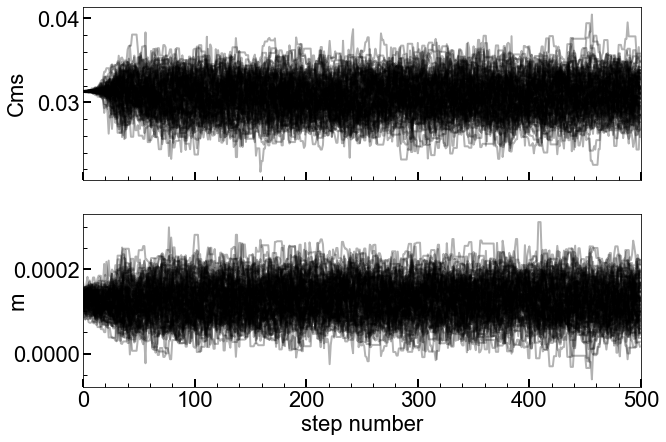

In [18]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
#samples = sampler.get_chain()
samples = sampler.chain
labels = ["Cms", "m"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(np.transpose(samples[:, :, i]), "k", alpha=0.3)
    ax.set_xlim(0, np.shape(samples)[1])
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

(100, 500, 2)
(40000, 2)


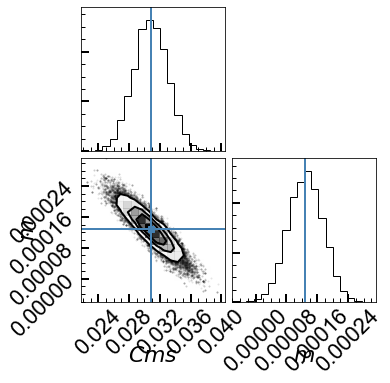

In [19]:
import corner
print(np.shape(samples))
samples = sampler.chain[:, 100:, :].reshape((-1, ndim))
print(np.shape(samples))
fig = corner.corner(samples, labels=["$Cms$", "$m$"],
                      truths=[Cms_ml, m_ml])

<ErrorbarContainer object of 3 artists>

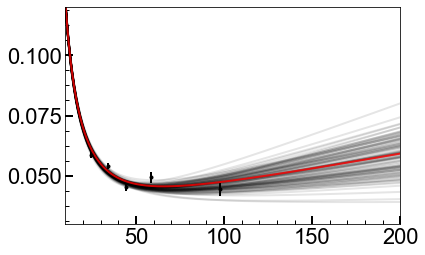

In [20]:
import matplotlib.pyplot as pl
xl = np.linspace(10, 200, 500)
#print(xl)
for Cms_em, m_em in samples[np.random.randint(len(samples), size=100)]:
    pl.plot(xl, np.sqrt(sigQnr_c_v(xl)**2+(Cms_em+m_em*xl)**2), color="k", alpha=0.1)
pl.plot(xl, np.sqrt(sigQnr_c_v(xl)**2+(Cms+slope*xl)**2), color="r", lw=2, alpha=0.8)
#pl.errorbar(x, y, yerr=yerr, fmt=".k")
pl.xlim(10, 200)
pl.ylim(0.03,0.12)
pl.errorbar(E_edw[2::], sig_edw[2::], yerr=sig_edw_err[2::], fmt=".k", capsize=0)

In [21]:
sampsize=100
evec = np.zeros((np.shape(xl)[0],sampsize))
#print(samples[np.random.randint(len(samples), size=sampsize)])
i=0
for Cms_em, m_em in samples[np.random.randint(len(samples), size=sampsize)]:
    v = np.sqrt(sigQnr_c_v(xl)**2+(Cms_em+m_em*xl)**2)
    #print(np.std(v))
    #print(np.mean(v))
    cent = np.sqrt(sigQnr_c_v(xl)**2+(Cms+slope*xl)**2)
    evec[:,i] = v
    #print(i)
    #print(np.mean(v)+np.std(v))
    #print(np.mean(v)-np.std(v))
    i=i+1
   
upvec = np.mean(evec,axis=1)+np.std(evec,axis=1)
dnvec = np.mean(evec,axis=1)-np.std(evec,axis=1)

In [22]:
import h5py

#save the results for the MS fit
path='{}/{}/'.format('mcmc','edwdata_binsys')

filename = 'data/mcmc_fits.h5'

#remove vars
f = h5py.File(filename,'a')
exCms = path+'Cms' in f
exm = path+'m' in f
exsamp = path+'samples' in f
exsampsize = path+'sampsize' in f
exEr = path+'Er' in f
exCsig_u = path+'Csig_u' in f
exCsig_l = path+'Csig_l' in f
exSigss = path+'Sigss' in f

if exCms:
  del f[path+'Cms']
if exm:
  del f[path+'m']
if exsamp:
  del f[path+'samples']
if exsampsize:
  del f[path+'sampsize']
if exEr:
  del f[path+'Er']
if exCsig_u:
  del f[path+'Csig_u']
if exCsig_l:
  del f[path+'Csig_l']
if exSigss:
  del f[path+'Sigss']

dset = f.create_dataset(path+'Cms',np.shape(Cms),dtype=np.dtype('float64').type)
dset[...] = Cms_ml
dset = f.create_dataset(path+'m',np.shape(slope),dtype=np.dtype('float64').type)
dset[...] = m_ml
dset = f.create_dataset(path+'samples',np.shape(samples),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = samples
dset = f.create_dataset(path+'sampsize',np.shape(sampsize),dtype=np.dtype('float64').type)
dset[...] = sampsize
dset = f.create_dataset(path+'Er',np.shape(xl),dtype=np.dtype('float64').type, \
compression="gzip")
dset[...] = xl
dset = f.create_dataset(path+'Csig_u',np.shape(upvec),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = upvec
dset = f.create_dataset(path+'Csig_l',np.shape(dnvec),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = dnvec
dset = f.create_dataset(path+'Sigss',np.shape(xl),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = sigQnr_c_v(xl)

f.close()